In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os
import seaborn
from  matplotlib import pyplot

In [59]:
df = pd.DataFrame(
    {
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

# df['A'] = 'A'
print(df)
# df = df.groupby(['A']).agg([('mean', np.mean), ('std', lambda x: np.sum(x))])
df = df.agg([('mean', np.mean), ('std', lambda x: np.sum(x))])
print(df)

          C         D
0 -0.430467 -0.873653
1  0.388067  1.317629
2  0.718145 -0.777610
3 -0.371695  1.771641
4  0.068818 -0.082900
5 -0.015005 -1.266811
6 -1.159062  0.449693
7  0.515098  0.662544


ValueError: cannot combine transform and aggregation operations

In [5]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

In [12]:
def plot_coefficients(path):
    df = pd.read_csv(path, sep=',')
    # df = df[df['bin'] == 925]
    # print(df)


    print('s1')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<s1>', 'err_s1', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 's1', fg)

    print('a1')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<a1>', 'err_a1', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'a1', fg)

    print('a2')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<a2>', 'err_a2', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'a2', fg)

    print('b3')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<b3>', 'err_b3', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'b3', fg)

    print('b2')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<b2>', 'err_b2', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'b2', fg)

    print('b1')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<b1>', 'err_b1', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'b1', fg)

    print('k2')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<k2>', 'err_k2', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'k2', fg)

    print('k4')

    fg = seaborn.FacetGrid(data=df,  aspect=1.61)
    fg.map(plt.errorbar, 'beta', '<k4>', 'err_k4', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    plt.show()

    # save_image('../../images/SU3_gluodynamics', 'k4', fg)

s1


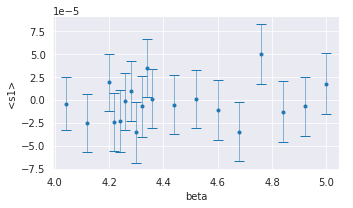

a1


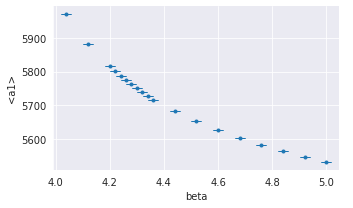

a2


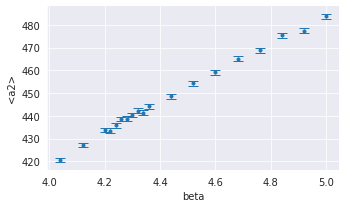

b3


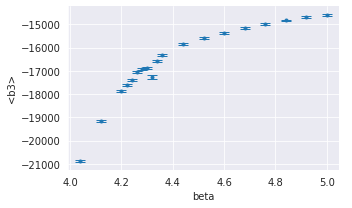

b2


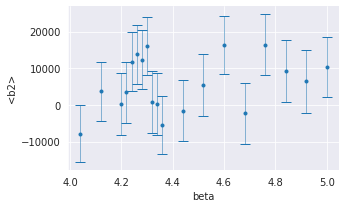

b1


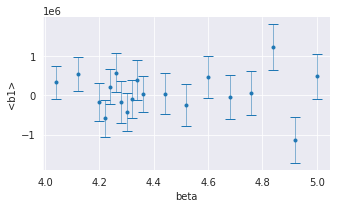

k2


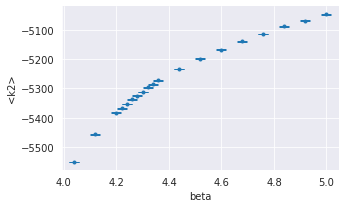

k4


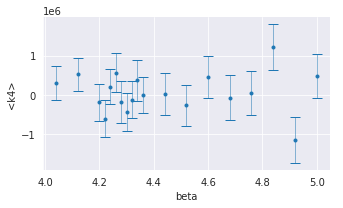

In [19]:
path = '../../result/SU3_gluodynamics/Nt6/coefficients.csv'
plot_coefficients(path)

s1


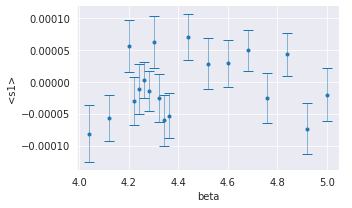

a1


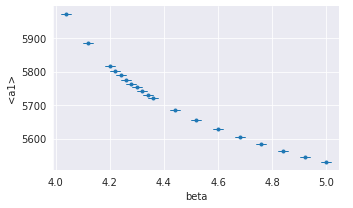

a2


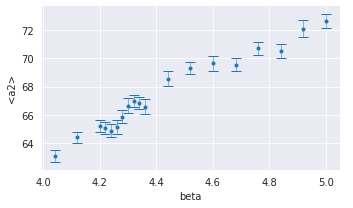

b3


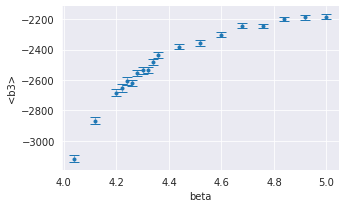

b2


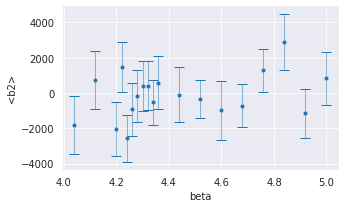

b1


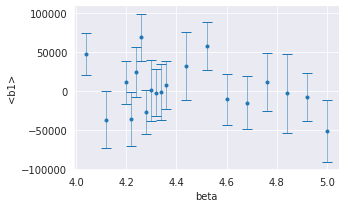

k2


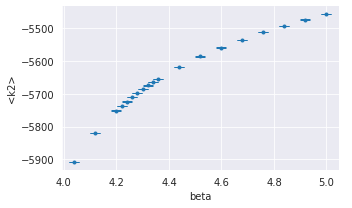

k4


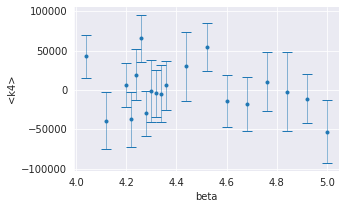

In [20]:
path = '../../result/SU3_gluodynamics/Nt6/coefficients.csv'
plot_coefficients(path)

s1


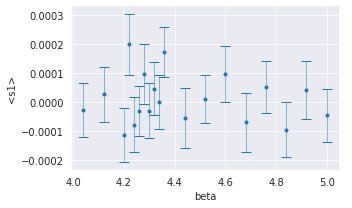

a1


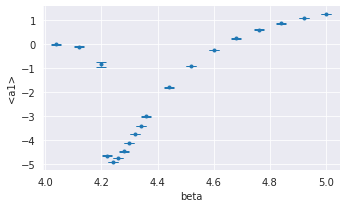

a2


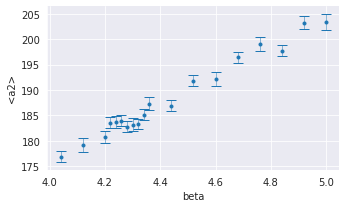

b3


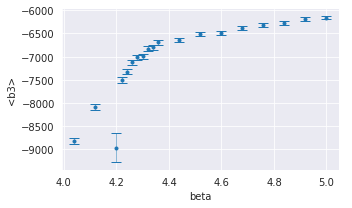

b2


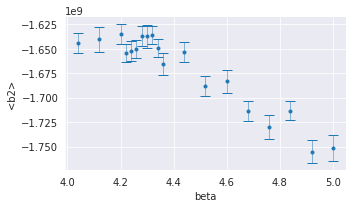

b1


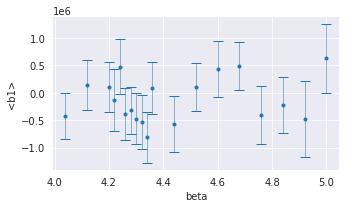

k2


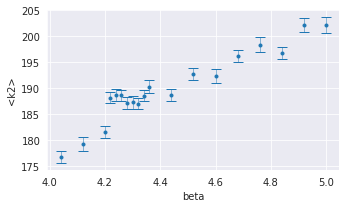

k4


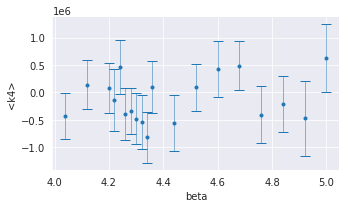

In [22]:
path = '../../result/SU3_gluodynamics/Nt5/coefficients.csv'
plot_coefficients(path)

s1


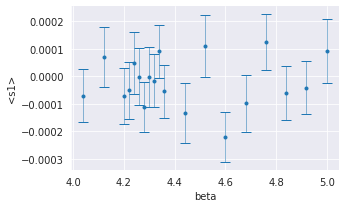

a1


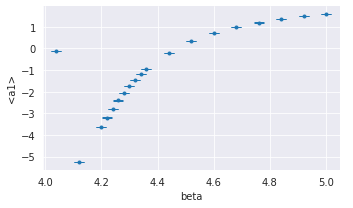

a2


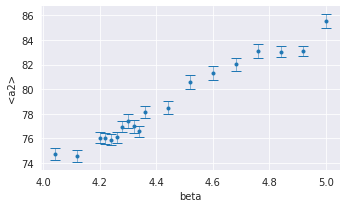

b3


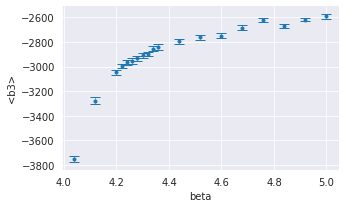

b2


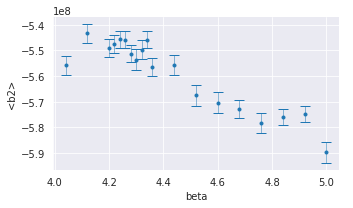

b1


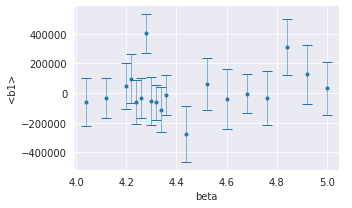

k2


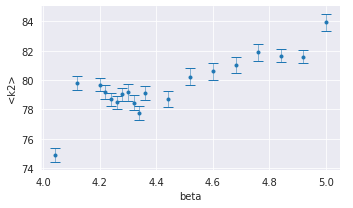

k4


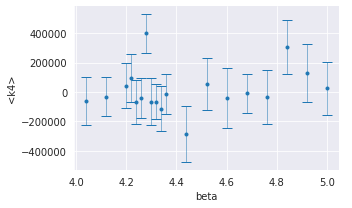

In [23]:
path = '../../result/SU3_gluodynamics/Nt4/coefficients.csv'
plot_coefficients(path)